**SVM USING DATASET OF BREAST CANCER**


In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

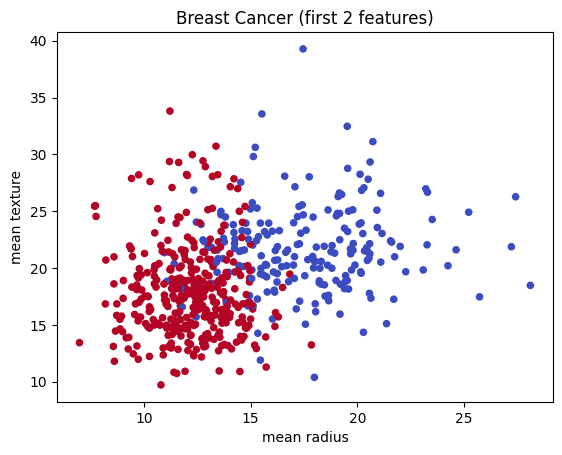

In [2]:
# Load breast cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]   # taking only first 2 features for visualization
y = cancer.target
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=20)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("Breast Cancer (first 2 features)")
plt.show()


In [3]:

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Train SVM model
svm = SVC(kernel='linear', C=10)  # you can try 'rbf', 'poly'
svm.fit(X_train, y_train)

,C,10
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


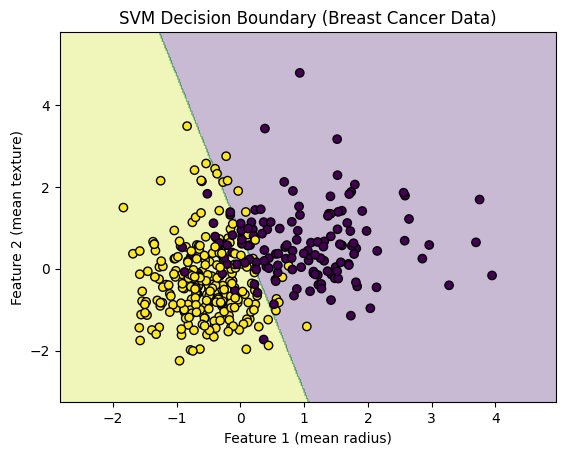

In [6]:
# Plot decision boundary
def plot_decision_boundary(X, y, model):
    # Create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict for each point
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1 (mean radius)')
    plt.ylabel('Feature 2 (mean texture)')
    plt.title('SVM Decision Boundary (Breast Cancer Data)')
    plt.show()

plot_decision_boundary(X_train, y_train, svm)

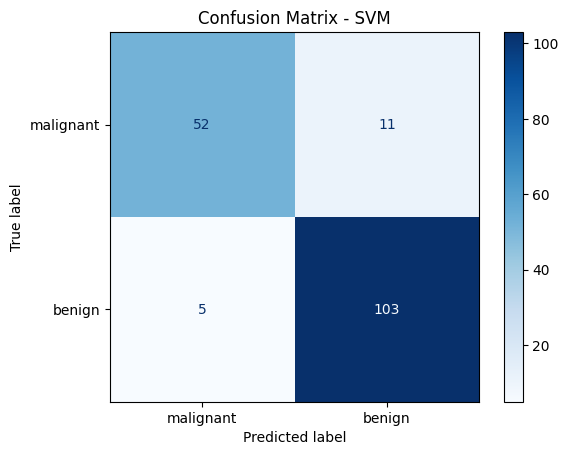

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# Confusion Matrix
# Confusion Matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

In [8]:
# Print accuracy
print("Train Accuracy:", svm.score(X_train, y_train))
print("Test Accuracy:", svm.score(X_test, y_test))

#model Accuracy
#ACCURACY
from sklearn import metrics
print("accuracy score (linear):" ,metrics.accuracy_score(y_test,y_pred))

Train Accuracy: 0.8819095477386935
Test Accuracy: 0.9064327485380117
accuracy score (linear): 0.9064327485380117


**USING THREE FEATURES**

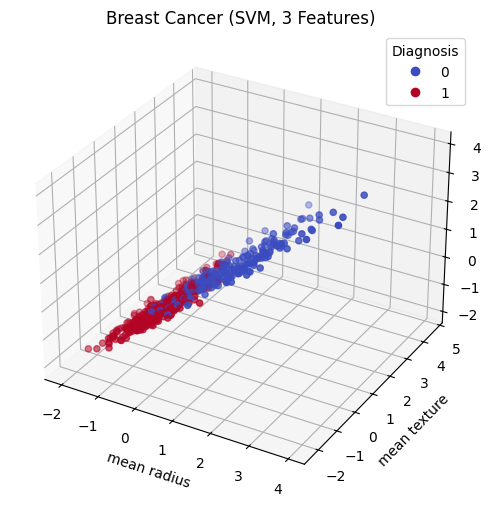

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load dataset
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :3]  
y = cancer.target

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_scaled, y)

# 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap=plt.cm.coolwarm)

ax.set_xlabel(cancer.feature_names[0])
ax.set_ylabel(cancer.feature_names[1])
ax.set_zlabel(cancer.feature_names[2])
plt.title("Breast Cancer (SVM, 3 Features)")
plt.legend(*scatter.legend_elements(), title="Diagnosis")
plt.show()


